In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
import keras.backend as K

from keras_tqdm import TQDMNotebookCallback

Using TensorFlow backend.


In [2]:
df = pd.read_csv('golds.csv')

In [3]:
df.columns = ['date', 'price']
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head()

,price
date,
2013-09-09,21250.0
2013-09-10,21050.0
2013-09-11,20800.0
2013-09-12,20400.0
2013-09-13,20050.0


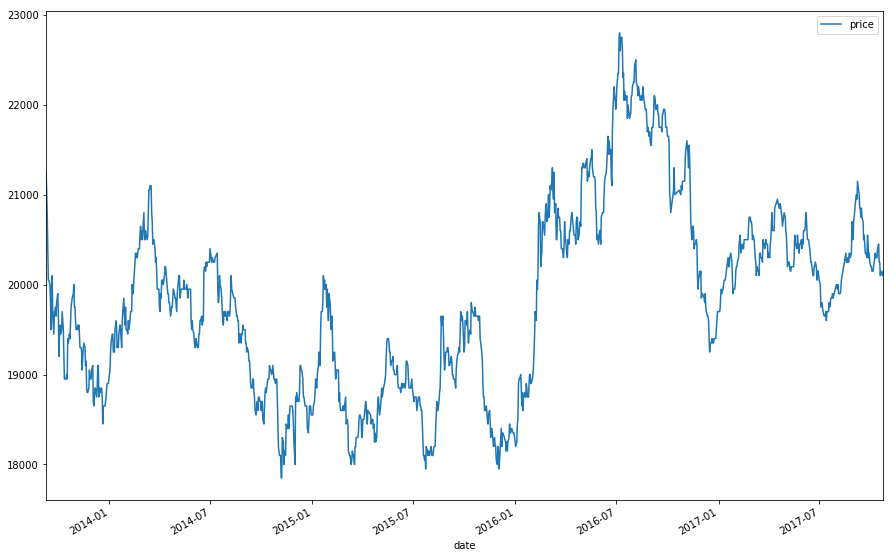

In [4]:
df.plot(figsize=(15,10))

In [5]:
df.describe()

,price
count,1224.000000
mean,19819.035948
std,1037.754771
min,17850.000000
25%,18950.000000
50%,19750.000000
75%,20500.000000
max,22800.000000


In [6]:
split_date = pd.Timestamp('10-01-2016')

In [7]:
train = df.loc[:split_date, ['price']]
test = df.loc[split_date:, ['price']]

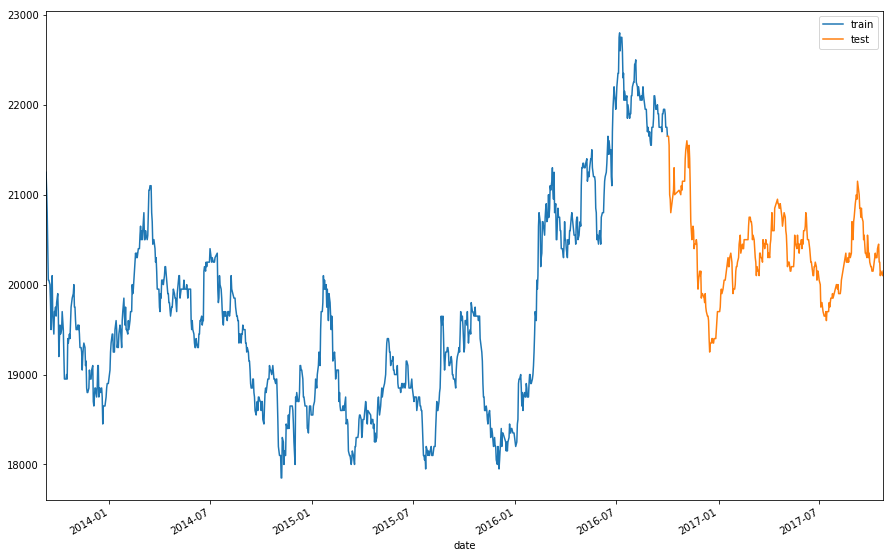

In [8]:
ax = train.plot()
test.plot(ax=ax, figsize=(15,10))
plt.legend(['train', 'test'])

In [9]:
sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [10]:
train_sc[:4]

array([[ 0.68686869],
       [ 0.64646465],
       [ 0.5959596 ],
       [ 0.51515152]])

In [11]:
train[:4]

,price
date,
2013-09-09,21250.0
2013-09-10,21050.0
2013-09-11,20800.0
2013-09-12,20400.0


In [12]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [13]:
train_sc.shape

(918, 1)

In [14]:
y_train

array([[ 0.64646465],
       [ 0.5959596 ],
       [ 0.51515152],
       [ 0.44444444],
       [ 0.44444444],
       [ 0.43434343],
       [ 0.39393939],
       [ 0.33333333],
       [ 0.43434343],
       [ 0.45454545],
       [ 0.36363636],
       [ 0.32323232],
       [ 0.37373737],
       [ 0.37373737],
       [ 0.38383838],
       [ 0.36363636],
       [ 0.39393939],
       [ 0.41414141],
       [ 0.37373737],
       [ 0.27272727],
       [ 0.31313131],
       [ 0.34343434],
       [ 0.32323232],
       [ 0.33333333],
       [ 0.37373737],
       [ 0.35353535],
       [ 0.33333333],
       [ 0.27272727],
       [ 0.22222222],
       [ 0.22222222],
       [ 0.22222222],
       [ 0.23232323],
       [ 0.22222222],
       [ 0.31313131],
       [ 0.3030303 ],
       [ 0.32323232],
       [ 0.31313131],
       [ 0.38383838],
       [ 0.39393939],
       [ 0.4040404 ],
       [ 0.41414141],
       [ 0.43434343],
       [ 0.38383838],
       [ 0.38383838],
       [ 0.35353535],
       [ 0

In [15]:
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [16]:
X_train_t.shape

(917, 1, 1)

In [17]:
K.clear_session()
model = Sequential()

model.add(LSTM(4, input_shape=(1, 1)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [18]:
model.fit(X_train_t, y_train,
          epochs=10, batch_size=1, verbose=0,
          callbacks=[TQDMNotebookCallback(leave_inner=True)])

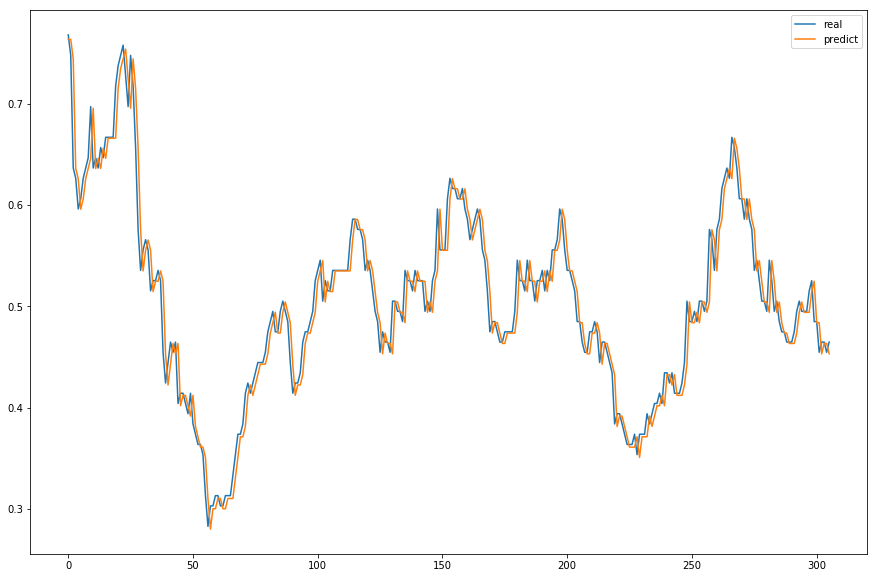

In [19]:
y_pred = model.predict(X_test_t)
plt.figure(figsize=(15, 10))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['real', 'predict'])

In [20]:
sc.inverse_transform(y_pred)[-1]

array([ 20092.48046875], dtype=float32)